# Analysis and visualization of scenarios and LCA results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.ticker as ticker
import matplotlib.lines as mlines
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
from pathlib import Path

In [2]:
# Standards for figures format:
# - length single column figure: 88 mm
# - length 1.5 column figure: 120-136 mm
# - length 2 columns figure: 180 mm
# - max. height figure : 247 mm

fig_length = {1:   3.46457,    # 1 column
              1.5: 5.35433,    # 1.5 columns
              2:   7.08661}    # 2 columns
fig_height = 9.72441 # maxium height
fontsize_title = 8
fontsize_label = 7
fontsize_legend = 7
fontsize_axs = 7
spineline_width = 0.5

def axis_standard_formating(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for spine in ax.spines.values():
        spine.set_linewidth(spineline_width)

    ax.tick_params(axis='y', which='major', direction='out', length=2, width=spineline_width, labelsize=fontsize_axs)
    ax.tick_params(axis='x', which='major', direction='out', length=2, width=spineline_width, labelsize=fontsize_axs)

## 1. Import results files

In [3]:
SCENARIO_DATA_DIR = Path("../scenario_data") 
RESULTS_DIR = Path("../results")
FIG_EXPORT_DIR = Path("../reports/figures")

LI_SCENARIOS = {
    "S&P-Baseline": "grey",
    "S&P-Ambitious": "blue",
    "S&P-Very Ambitious": "orange"
}

IAM_SCENARIOS = [
    "SSP2-NDC",
    "SSP2-2°C"
]

YEARS = [
    "2020",
    "2025",
    "2030",
    "2035",
]

COUNTRIES = {
    "Argentina": '#542788',
    "Bolivia": '#998ec3',
    "Chile": '#d8daeb',
    "China":   '#fee0b6',
    "Germany": '#f1a340',
    "USA": '#b35806'
    }

COUNTRY_LABEL = {
    "AR": "Argentina",
    "BO": "Bolivia",
    "CL": "Chile",
    "CN": "China",
    "DE": "Germany",
    "US": "USA", 
}

TECHNOLOGIES = {
    "Evaporative ponds": "#006d2c",
    "Ion exchangers": "#a1d99b",
    "DLE": "#d9d9d9",
    "Geothermal": "#bdbdbd",
    "Modelled as average": "#636363"
}

PROCESS_CONTRIBUTIONS = {
    "Electricity": '#c7522a',
    "Heat": '#e5c185',
    "Reagents": '#abc4ff',
    "Direct emissions": '#74a892',
    "Other": '#008585'
    }

# Lithium scenarios results
lithium_production_total = pd.read_csv(RESULTS_DIR / "lithium_production_total_22-01-2025.csv", index_col=0)
lithium_production_by_country = pd.read_csv(RESULTS_DIR / "lithium_production_by_country_22-01-2025.csv", index_col=0)
lithium_production_by_country['region'] = lithium_production_by_country['region'].replace(COUNTRY_LABEL)
lithium_production_by_technolgy = pd.read_csv(RESULTS_DIR / "lithium_production_by_technology_22-01-2025.csv", index_col=0)

# Performance indicators
performance_indicators = pd.read_csv(RESULTS_DIR / "performance_indicators_06-04-2025.csv", index_col=0)

# LCA results

# Impacts intensity by project in each scenario
impacts_intensity_projects_NDC = pd.read_csv(RESULTS_DIR / "impacts_intensity_by_project_NDC_06-04-2025.csv")

impacts_by_country = pd.read_csv(RESULTS_DIR / "annual_impacts_by_country_06-04-2025.csv")
impacts_by_country['Country'] = impacts_by_country['Country'].replace(COUNTRY_LABEL)

impacts_by_technology = pd.read_csv(RESULTS_DIR / "annual_impacts_by_technology_NDC_06-04-2025.csv")
impacts_by_source = pd.read_csv(RESULTS_DIR / "annual_impacts_by_source_NDC_06-04-2025.csv")

# Sensitivity analysis
SA_impacts_sources_df = pd.read_csv(RESULTS_DIR / "SA_impacts_sources_2035_NDC_06-04-2025.csv")
SA_country_impacts_intensity_df = pd.read_csv(RESULTS_DIR / "SA_country_impacts_intensity_NDC06-04-2025.csv")

## 2. Lithium supply scenarios (Figure 2)

In [65]:
lithium_production_total

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
scenario,,,,,,,,,,,,,,,,
S&P-Ambitious,176.879,223.589,294.684,324.336,427.77735,582.8736,629.97825,676.95325,696.93925,790.27365,877.23905,943.09125,999.80925,1010.62825,1015.69125,1008.10125
S&P-Baseline,176.879,217.618,286.723,313.496,388.29980,458.9546,494.67400,510.76000,527.57000,584.34900,609.75700,625.37900,661.70700,669.24000,669.38100,661.81800
S&P-Very Ambitious,176.879,223.589,294.684,324.377,432.95935,608.0426,660.12325,742.43325,812.15325,942.31965,1076.25105,1160.62525,1241.84325,1259.16225,1266.22525,1251.63525


In [66]:
# Check that sum of countries is equal to total production
lithium_production_by_country.groupby(lithium_production_by_country.index).sum()

,region,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
scenario,,,,,,,,,,,,,,,,,
S&P-Ambitious,ArgentinaBoliviaChileChinaGermanyUSA,176.879,223.589,294.684,324.336,427.77735,582.8736,629.97825,676.95325,696.93925,790.27365,877.23905,943.09125,999.80925,1010.62825,1015.69125,1008.10125
S&P-Baseline,ArgentinaBoliviaChileChinaGermanyUSA,176.879,217.618,286.723,313.496,388.29980,458.9546,494.67400,510.76000,527.57000,584.34900,609.75700,625.37900,661.70700,669.24000,669.38100,661.81800
S&P-Very Ambitious,ArgentinaBoliviaChileChinaGermanyUSA,176.879,223.589,294.684,324.377,432.95935,608.0426,660.12325,742.43325,812.15325,942.31965,1076.25105,1160.62525,1241.84325,1259.16225,1266.22525,1251.63525


In [67]:
# Supply times increase 2020-2035:
lithium_production_total["2035"] / lithium_production_total["2020"]

scenario
S&P-Ambitious         5.699383
S&P-Baseline          3.741643
S&P-Very Ambitious    7.076223
dtype: float64

In [68]:
# Supply times increase 2020-2035:
print("Increase 2020 vs Baseline 2035:", (lithium_production_total.loc["S&P-Baseline"]["2035"] - lithium_production_total.loc["S&P-Baseline"]["2020"]) * 100 / lithium_production_total.loc["S&P-Baseline"]["2020"], "%")
print("Increase Ambitious vs Baseline 2035:", (lithium_production_total.loc["S&P-Ambitious"]["2035"] - lithium_production_total.loc["S&P-Baseline"]["2035"]) * 100 / lithium_production_total.loc["S&P-Baseline"]["2035"], "%")
print("Increase Very Ambitious vs Ambitious 2035:", (lithium_production_total.loc["S&P-Very Ambitious"]["2035"] - lithium_production_total.loc["S&P-Ambitious"]["2035"]) * 100 / lithium_production_total.loc["S&P-Ambitious"]["2035"], "%")

Increase 2020 vs Baseline 2035: 274.16425918283113 %
Increase Ambitious vs Baseline 2035: 52.32303291841564 %
Increase Very Ambitious vs Ambitious 2035: 24.157692493685527 %


In [69]:
# Production share by country:
aligned_total_production = lithium_production_total.loc[lithium_production_by_country.index]
lithium_share_by_country = pd.DataFrame(index=lithium_production_by_country.index)
lithium_share_by_country["region"] = lithium_production_by_country["region"]
lithium_share_by_country = pd.concat([lithium_share_by_country, lithium_production_by_country.iloc[:,1:].div(aligned_total_production.values).multiply(100)], axis=1)
lithium_share_by_country

,region,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
scenario,,,,,,,,,,,,,,,,,
S&P-Ambitious,Argentina,17.934859,14.041836,12.369182,13.937090,22.707373,26.763436,29.454350,31.966018,32.981928,36.701844,38.640437,39.929964,41.896792,42.003378,42.087987,42.404868
S&P-Ambitious,Bolivia,0.000000,0.000000,0.000000,0.000000,0.233766,0.772037,1.246075,1.757876,2.023132,2.176461,2.667460,3.605165,4.600878,4.897943,4.873528,4.910221
S&P-Ambitious,Chile,63.433194,66.371780,68.717677,66.443441,58.276110,46.771890,45.378233,42.361714,41.983286,40.314263,37.270001,35.362220,33.507191,33.148490,32.846104,32.244479
S&P-Ambitious,China,12.978364,17.350138,17.216408,18.077858,17.861009,22.655958,17.555408,17.995962,18.554020,17.765776,17.268526,16.650589,15.706021,15.537884,15.460432,15.576833
S&P-Ambitious,Germany,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.520122,3.275854,3.181913,1.122447,2.022345,2.351416,2.218023,2.194279,2.183341,2.199779
S&P-Ambitious,USA,5.653582,2.236246,1.696733,1.541611,0.921741,3.036679,2.845813,2.642575,1.275721,1.919209,2.131232,2.100645,2.071095,2.218026,2.548609,2.663820
S&P-Baseline,Argentina,17.934859,14.427115,12.712618,14.419004,20.408715,24.325282,24.522413,24.533245,24.413632,27.318777,30.344875,32.082465,35.808749,36.302223,36.294577,36.709337
S&P-Baseline,Bolivia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
S&P-Baseline,Chile,63.433194,68.192888,70.625656,68.740909,64.200909,59.400429,57.790181,56.145548,55.461455,54.521014,52.249175,50.943988,48.147141,47.605194,47.387064,46.785823


In [28]:
technology_data = lithium_production_by_technolgy.loc["S&P-Very Ambitious"].reset_index(drop=True).set_index("technology")
technology_data.div(technology_data.sum()).multiply(100)

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
technology,,,,,,,,,,,,,,,,
DLE,24.173022,25.751714,25.220575,25.024586,25.733028,30.032764,26.857598,29.834500,31.841312,34.162956,33.596553,35.900326,38.449317,38.873485,38.656649,39.506737
Evaporative ponds,63.433194,66.371780,68.717677,68.284743,65.297354,54.738599,53.182341,48.682222,45.836423,45.910536,45.352708,44.687982,42.370082,41.756334,41.649225,41.450974
Geothermal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.359373,2.986935,2.730519,0.941337,1.648389,1.910694,1.785733,1.761171,1.751347,1.771762
Ion exchangers,12.393783,7.876506,6.061747,6.690672,7.807615,8.115813,8.572036,7.616442,6.962848,5.995312,5.250634,4.627937,4.326552,4.388791,4.485458,4.537744
Modelled as average,0.000000,0.000000,0.000000,0.000000,1.162003,7.112824,8.028652,10.879901,12.628897,12.989860,14.151717,12.873061,13.068316,13.220218,13.457321,12.732783


C:\Users\istrateir\AppData\Local\Temp\ipykernel_16344\831516227.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row,col].set_xticklabels(['2020', "2025", '2030', '2035'], rotation=0, fontsize=fontsize_axs)


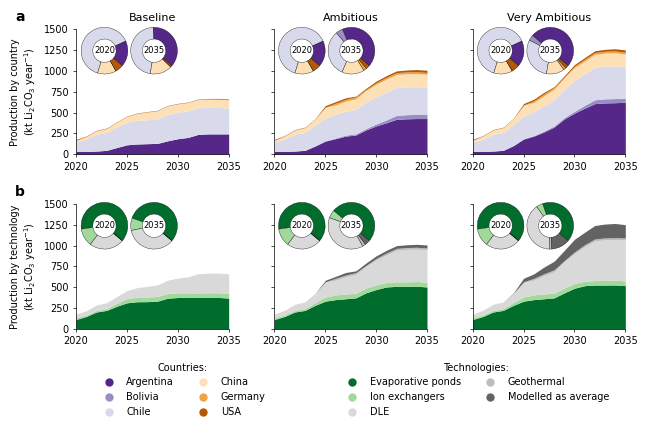

In [ ]:
fig, axs = plt.subplots(2, len(LI_SCENARIOS), figsize=(fig_length[2], fig_height*0.4), sharey="row")

axs[0,0].set_title("a", loc='left', x=-0.4, fontweight='bold', fontsize=10)
axs[1,0].set_title("b", loc='left', x=-0.4, fontweight='bold', fontsize=10)

axs[0,0].set_ylabel("Production by country\n(kt Li$_2$CO$_3$ year$^{-1}$)", fontsize=fontsize_label)
axs[1,0].set_ylabel("Production by technology\n(kt Li$_2$CO$_3$ year$^{-1}$)", fontsize=fontsize_label)

for row in range(2):
    for col in range(len(LI_SCENARIOS)):
        scenario_name = list(LI_SCENARIOS.keys())[col]
        axs[0,col].set_title(scenario_name.replace("S&P-", "").strip("-"), loc='center', fontsize=fontsize_title)
        axis_standard_formating(axs[row,col])
        axs[row,col].set_xticklabels(['2020', "2025", '2030', '2035'], rotation=0, fontsize=fontsize_axs)   
        axs[row,col].set_xticks([0,5,10,15])
        axs[row,col].set_xlim(0,15)
        axs[row,col].set_ylim(0, 1500)

counter = 0
for sc in LI_SCENARIOS:    

    # ###############################################
    # Production by country
    # ###############################################    
    country_data = lithium_production_by_country.loc[sc].reset_index(drop=True).set_index("region")
    country_data = country_data.reindex(COUNTRIES.keys())
    country_data.T.plot(ax=axs[0,counter], kind='area', stacked=True, legend=False, color=COUNTRIES.values(), lw=0, zorder=2)

    # ###############################################
    # Production by technology
    # ###############################################
    technology_data = lithium_production_by_technolgy.loc[sc].reset_index(drop=True).set_index("technology")
    technology_data = technology_data.reindex(TECHNOLOGIES.keys())
    technology_data.T.plot(ax=axs[1,counter], kind='area', stacked=True, legend=False, color=TECHNOLOGIES.values(), lw=0, zorder=2)

    count_data = 0
    for data in [country_data, technology_data]:
        relative_shares = data[["2020", "2035"]].div(data[["2020", "2035"]].sum(axis=0), axis=1) * 100

        donut_size = 0.15
        donut_2020 = fig.add_axes([axs[count_data,counter].get_position().x0 - (0.035 if counter==0 else 0.03 if counter==1 else 0.023),
                                  axs[count_data,counter].get_position().y0 + (0.22 if count_data==0 else 0.19), 
                                  donut_size, donut_size])
        donut_2035 = fig.add_axes([axs[count_data,counter].get_position().x0 + (0.035 if counter==0 else 0.04 if counter==1 else 0.047), 
                                 axs[count_data,counter].get_position().y0 + (0.22 if count_data==0 else 0.19), 
                                 donut_size, donut_size])
        
        dn_data = [
            [donut_2020, relative_shares["2020"].values, "2020"],
            [donut_2035, relative_shares["2035"].values, "2035"]
        ]

        for dn in dn_data:
            wedges, texts = dn[0].pie(dn[1], colors=COUNTRIES.values() if count_data==0 else TECHNOLOGIES.values(),
                                      wedgeprops={'edgecolor': 'black', 'linewidth': 0.25, "width": 0.5}, startangle=-40)
            bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
            kw = dict(arrowprops=dict(arrowstyle="-"),
                    bbox=bbox_props, zorder=0, va="center")

            for i, p in enumerate(wedges):
                ang = (p.theta2 - p.theta1)/2. + p.theta1
                y = np.sin(np.deg2rad(ang))
                x = np.cos(np.deg2rad(ang))
                horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
                connectionstyle = f"angle,angleA=0,angleB={ang}"
                kw["arrowprops"].update({"connectionstyle": connectionstyle})

            dn[0].text(0, 0, dn[2], color="black", ha='center', va='center', fontsize=6)
        count_data += 1
    counter += 1

# LEGENDS
handles = []
for c in COUNTRIES:
    patch = Line2D([0], [0], color=COUNTRIES[c], label=c, ls='None', marker='o', mec="None", ms=6)
    handles.append(patch)
leg_countries = axs[1,0].legend(handles=handles, bbox_to_anchor=(1.3,-0.2), ncol=2, frameon=False, edgecolor='black',  
                                facecolor='White', fontsize=fontsize_legend, title='Countries:')

handles = []
for c in TECHNOLOGIES:
    patch = Line2D([0], [0], color=TECHNOLOGIES[c], label=c, ls='None', marker='o', mec="None", ms=6)
    handles.append(patch)
leg_techs = axs[1,1].legend(handles=handles, bbox_to_anchor=(2.25,-0.2), ncol=2, frameon=False, edgecolor='black',  
                            facecolor='White', fontsize=fontsize_legend, title='Technologies:')

for leg in [leg_countries, leg_techs]:
    leg.get_frame().set_linewidth(0.5)
    leg.get_title().set_fontsize(fontsize_legend)
    leg._legend_box.align = "center"

fig.subplots_adjust(hspace=0.4, wspace=0.3)
plt.savefig(FIG_EXPORT_DIR / "fig2_supply_scenarios_v2.jpg", dpi=600, bbox_inches='tight')

## 3. Performance indicators (Figure 3)

In [4]:
performance_indicators

,Year,Li concentration,Electricity intensity,Heat intensity,Reagent intensity,Freshwater intensity
Lithium scenario,,,,,,
S&P-Baseline,2020,0.112378,2.909350,78.908975,3.691135,115.849700
S&P-Baseline,2025,0.111255,2.935744,76.635564,3.512475,110.143044
S&P-Baseline,2030,0.102328,3.402132,99.948347,3.894155,126.503138
S&P-Baseline,2035,0.094075,3.649471,119.638832,4.551685,142.343838
S&P-Ambitious,2020,0.112378,2.909350,78.908975,3.691135,115.849700
S&P-Ambitious,2025,0.095511,3.925607,122.335948,3.891736,133.142192
S&P-Ambitious,2030,0.085770,4.182668,126.208448,5.051458,152.517356
S&P-Ambitious,2035,0.079771,4.362404,138.107322,6.001923,166.918347
S&P-Very Ambitious,2020,0.112378,2.909350,78.908975,3.691135,115.849700


In [5]:
# Calculate relative difference between 2020 and 2035
performance_indicators_2020 = performance_indicators[performance_indicators['Year'] == 2020]
performance_indicators_2035 = performance_indicators[performance_indicators['Year'] == 2035]
performance_indicators_merged = pd.merge(performance_indicators_2020, performance_indicators_2035, 
                                        on='Lithium scenario', suffixes=('_2020', '_2035'))

performance_indicators_relative_diff = {}
for col in ['Li concentration', 'Electricity intensity', 'Heat intensity', 'Reagent intensity', 'Freshwater intensity']:
    performance_indicators_relative_diff[col] = round(((performance_indicators_merged[f'{col}_2035'] - performance_indicators_merged[f'{col}_2020']) / performance_indicators_merged[f'{col}_2020']) * 100,0)

performance_indicators_relative_diff = pd.DataFrame(performance_indicators_relative_diff)
performance_indicators_relative_diff

,Li concentration,Electricity intensity,Heat intensity,Reagent intensity,Freshwater intensity
Lithium scenario,,,,,
S&P-Baseline,-16.0,25.0,52.0,23.0,23.0
S&P-Ambitious,-29.0,50.0,75.0,63.0,44.0
S&P-Very Ambitious,-33.0,53.0,96.0,100.0,55.0


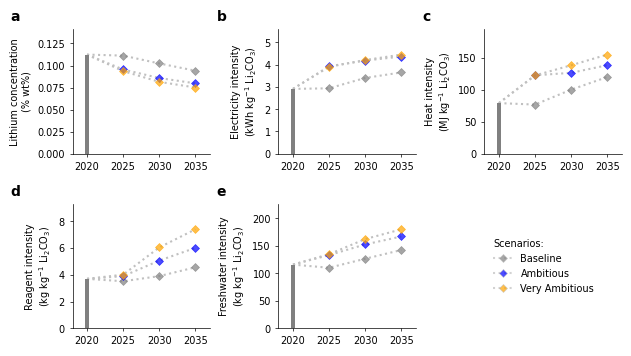

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(fig_length[2], fig_height*0.4))

labels_ax = ["a", "b", "c", "d", "e"]
labels_indic = [
    "Lithium concentration\n(% wt%)",
    "Electricity intensity\n(kWh kg$^{-1}$ Li$_2$CO$_3$)",
    "Heat intensity\n(MJ kg$^{-1}$ Li$_2$CO$_3$)",
    "Reagent intensity\n(kg kg$^{-1}$ Li$_2$CO$_3$)",
    "Freshwater intensity\n(kg kg$^{-1}$ Li$_2$CO$_3$)"
    ]
axs[1,2].axis('off')
counter = 0
for row in range(2):
    for col in range(3):
        if counter==5:
            pass
        else:
            axs[row,col].set_title(labels_ax[counter], loc='left', x=-0.45, fontweight='bold', fontsize=10)
            axs[row,col].set_ylabel(labels_indic[counter], fontsize=fontsize_label)
            axis_standard_formating(axs[row,col])
            axs[row,col].set_xticks([2020, 2025, 2030, 2035])
            axs[row,col].set_xticklabels(['2020', "2025", '2030', '2035'], rotation=0, fontsize=fontsize_axs)
            axs[row,col].set_xlim(2018, 2037)

            for li_sc in LI_SCENARIOS:
                years = performance_indicators.loc[li_sc]["Year"].tolist()
                indicator_results = performance_indicators.loc[li_sc].iloc[:,counter+1].tolist()
                
                axs[row,col].bar(2020, indicator_results[0], width=.5, zorder=2, color="grey")
                axs[row,col].plot(years[1:], indicator_results[1:], ls="None", mew=0.5, marker="D", ms=4, zorder=2, alpha=0.7, color=LI_SCENARIOS[li_sc])
                axs[row,col].plot(years, indicator_results, lw=1.5, ls=":", zorder=0, color="silver")

              #  axs[row, col].scatter(years[0], indicator_results[0], s=0, color=LI_SCENARIOS[li_sc], zorder=1)


            ymin, ymax = axs[row,col].get_ylim()
            axs[row,col].set_ylim(0, ymax*1.2)

        counter += 1

# Legend
handles = []
for s in LI_SCENARIOS:
    scenario_name = s.replace("S&P-", "").strip("-")
    patch = Line2D([0], [0], mfc=LI_SCENARIOS[s], label=scenario_name, marker="D", mew=0.5, ms=4, ls=':', alpha=0.7, color="silver", lw=1.5)
    handles.append(patch)
leg = axs[1,2].legend(handles=handles,  loc="center left", ncol=1, frameon=False, edgecolor='black', 
                    facecolor='White', fontsize=fontsize_legend, title='Scenarios:')
leg.get_title().set_fontsize(fontsize_legend)
leg._legend_box.align = "left"
leg.get_frame().set_linewidth(0.5)

fig.subplots_adjust(hspace=0.4, wspace=0.5)

plt.savefig(FIG_EXPORT_DIR / "fig3_performance_indicators.jpg", dpi=600, bbox_inches='tight')

## 4. Impacts intensity

In [7]:
def impact_intensity_by_country(impact, li_scenario):
    df_intensity = impacts_by_country[(impacts_by_country["Impact"] == impact) & 
                                         (impacts_by_country["Lithium scenario"] == li_scenario) &
                                         (impacts_by_country["IAM scenario"] == "SSP2-NDC")][["Country", "Year", "Intensity"]].pivot_table(
                                         index='Country', columns='Year')["Intensity"]

    return df_intensity

def impact_intensity_by_project(impact, li_scenario):
    impacts_intensity_sc = impacts_intensity_projects_NDC[(impacts_intensity_projects_NDC["Impact"]==impact) &
                                                        (impacts_intensity_projects_NDC["Lithium scenario"]==li_scenario)][["Year", "Project name", "Intensity"]]
    impacts_intensity_sc = impacts_intensity_sc.pivot_table(index="Year", columns="Project name", values="Intensity").T

    return impacts_intensity_sc

In [41]:
def fig_impacts_intensity(
        impact, ylabel, y_lim, fig_name
):    
    fig, axs = plt.subplots(1, len(LI_SCENARIOS), figsize=(fig_length[2], fig_height*0.25), sharey="row")

    year_colors = ["grey", "black"]
    country_pos = [[0,1], [3,4], [6,7], [9,10], [12,13], [15,16]]
    country_label = ["AR", "BO", "CL", "CN", "DE", "USA"]

    for col in range(len(LI_SCENARIOS)):
        scenario_name = list(LI_SCENARIOS.keys())[col]
        axs[col].set_title(scenario_name.replace("S&P-", "").strip("-"), loc='center', fontsize=fontsize_title)
        axis_standard_formating(axs[col])    
    axs[0].set_ylabel(ylabel, fontsize=fontsize_label)

    count_sc = 0
    for li_scenario in LI_SCENARIOS:
        intensity_country_sc = impacts_by_country[(impacts_by_country["Impact"] == impact) & 
                                                (impacts_by_country["Lithium scenario"] == li_scenario) & 
                                                (impacts_by_country["IAM scenario"] == "SSP2-NDC")][["Country", "Year", "Intensity"]].pivot_table(
                                                index='Country', columns='Year')["Intensity"]
        
        count_c = 0
        for c in COUNTRIES:
            
            # Plot country average intensity values
            if c not in intensity_country_sc.index:
                intensity_country_sc.loc[c] = np.nan
            intensity_values = intensity_country_sc.loc[c][[2020, 2035]].values
            intensity_values = np.where(intensity_values == 0, np.nan, intensity_values)
            bars = axs[count_sc].bar(country_pos[count_c], intensity_values, color=COUNTRIES[c], width=0.8, zorder=2) 

            # Plot intensity of projects within country
            country_code = [k for k,v in COUNTRY_LABEL.items() if v==c][0]
            intensity_projects_sc = impacts_intensity_projects_NDC[(impacts_intensity_projects_NDC["Impact"]==impact) &
                                                (impacts_intensity_projects_NDC["Lithium scenario"]==li_scenario) &
                                                (impacts_intensity_projects_NDC["Country"]==country_code)]
            intensities_values_plot = [
                intensity_projects_sc[intensity_projects_sc["Year"]==2020]["Intensity"].to_list(),
                intensity_projects_sc[intensity_projects_sc["Year"]==2035]["Intensity"].to_list()]
            
            x_flat = [country_pos[count_c][i] for i in range(len(country_pos[count_c])) for _ in intensities_values_plot[i]]
            y_flat = [val for sublist in intensities_values_plot for val in sublist]

             # Scatter plot for project intensities
            axs[count_sc].scatter(x_flat, y_flat, marker="o", color="white", s=10, linewidths=0.5, 
                                  zorder=2, alpha=1, edgecolors="black")

            count_c += 1

        # Add intensity for World
        axs[count_sc].axhline(intensity_country_sc.loc["World"][[2020]].values, color=year_colors[0], ls="--", lw=1, zorder=0)
        axs[count_sc].axhline(intensity_country_sc.loc["World"][[2035]].values, color=year_colors[1], ls="--", lw=1, zorder=0)

      #  axs[count_sc].set_xticks([0.5, 3.5, 6.5, 9.5, 12.5, 15.5])
      #  axs[count_sc].set_xticklabels(["AR", "BO", "CL", "CN", "DE", "USA"], rotation=0, ha="center", fontsize=fontsize_axs)
        axs[count_sc].set_xticks([item for sublist in country_pos for item in sublist])
        axs[count_sc].set_xticklabels(["2020", "2035"] * len(country_pos), rotation=90, ha="center", fontsize=fontsize_axs)
        axs[count_sc].tick_params(axis='x', which='major', direction='out', length=2, width=spineline_width, labelsize=fontsize_axs)

        count_c = 0
        for i in [0.09, 0.25, 0.42, 0.575, 0.734, 0.895]:
            axs[count_sc].text(i, -0.2, country_label[count_c], ha='center', va='top', fontsize=fontsize_axs, transform=axs[count_sc].transAxes)
            count_c += 1
        count_sc += 1

    axs[0].set_ylim(y_lim)

    # Legend
    patch_country_ints = Line2D([0], [0], mfc=COUNTRIES["Argentina"], label="Country intensity", marker="s", 
                           mew=0, ms=5, mec="None", ls="None")
    project_ints = Line2D([0], [0], mfc="white", label="Projects intensity", marker="o", mec="black", mew=0.5, ms=3, ls="None")
    patch_2020_glo = Line2D([0], [0], ls="--", label="2020 Global average", color=year_colors[0], lw=1)
    patch_2035_glo = Line2D([0], [0], ls="--", label="2035 Global average", color=year_colors[1], lw=1)

    handles = [patch_country_ints, project_ints, patch_2020_glo, patch_2035_glo]
    leg = axs[0].legend(handles=handles,  bbox_to_anchor=(3.4,-0.28), ncol=4, frameon=False, edgecolor='black', 
                        facecolor='White', fontsize=fontsize_legend)
    leg.get_frame().set_linewidth(0.5)

    fig.subplots_adjust(hspace=0.4, wspace=0.2)
    plt.savefig(FIG_EXPORT_DIR / fig_name, dpi=600, bbox_inches='tight')

In [9]:
def fig_impacts_intensity_projects(
        impact, cmap, vmax, cbar_label, fig_name):
    fig, axs = plt.subplots(1, len(LI_SCENARIOS), figsize=(fig_length[2], fig_height*0.6), sharey="row")
    all_project_names = impacts_intensity_projects_NDC["Project name"].unique()
    count_sc = 0
    for li_sc in LI_SCENARIOS:
        axs[count_sc].set_title(li_sc.replace("S&P-", "").strip("-"), loc='center', fontsize=fontsize_title)
        axs[count_sc].spines['right'].set_visible(False)
        axs[count_sc].spines['top'].set_visible(False)

        # Impacts intensity for project
        impacts_intensity_sc = impact_intensity_by_project(impact, li_sc)
        impacts_intensity_sc = impacts_intensity_sc.reindex(all_project_names).sort_index()
        sns.heatmap(ax=axs[count_sc], data=impacts_intensity_sc, cmap=cmap, cbar=False, 
                    vmin=0, vmax=vmax, annot=True, fmt='.3', annot_kws={"size": 7}, 
                    xticklabels=False, yticklabels=True, linewidths=0.8, linecolor='white')
        
        axs[count_sc].set_xticks([0.5,1.5,2.5,3.5])
        axs[count_sc].set_xticklabels(['2020', "2025", '2030', '2035'], rotation=0, ha="center", fontsize=fontsize_axs)
        axs[count_sc].tick_params(axis='x', which='major', direction='out', length=0, labelsize=fontsize_axs)
        axs[count_sc].tick_params(axis='y', which='major', direction='out', length=0, labelsize=fontsize_axs)
        axs[count_sc].set_xlabel("")
        axs[count_sc].set_ylabel("")   

        count_sc += 1

    axins1 = fig.add_axes([0.34, 0.03, 0.35, 0.02])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=vmax))
    cbar = axs[1].figure.colorbar(sm, alpha=1, cax=axins1, orientation="horizontal")
    cbar.ax.minorticks_on()
    cbar.ax.tick_params(which='major', direction='out', length=4, labelsize=fontsize_axs)
    cbar.ax.tick_params(which='minor', direction='out', length=2.5, labelsize=fontsize_axs)
    cbar.ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    cbar.set_label(cbar_label, loc='center', fontsize=fontsize_label)

    plt.savefig(FIG_EXPORT_DIR / fig_name, dpi=600, bbox_inches='tight')

### Figures 4: contry-specific and global average climate impacts intensity

In [10]:
print(impact_intensity_by_country("Climate change", "S&P-Baseline"))
print("-----------------------------------------------")
print(impact_intensity_by_country("Climate change", "S&P-Ambitious"))
print("-----------------------------------------------")
print(impact_intensity_by_country("Climate change", "S&P-Very Ambitious"))

Year            2020       2025       2030       2035
Country                                              
Argentina  21.149956  13.394356  16.043893  19.144236
Chile       3.638364   3.301261   3.043050   2.914850
China      33.833012  31.560354  30.596546  28.688163
USA         2.795243   2.593869   2.173927   1.919249
World      10.650148  10.065708  11.563049  12.809285
-----------------------------------------------
Year            2020       2025       2030       2035
Country                                              
Argentina  21.149956  14.755431  15.196456  16.083135
Bolivia          NaN  33.346725  31.427934  29.984873
Chile       3.638364   3.301261   3.123189   3.060713
China      33.833012  37.002259  33.883876  32.143204
Germany          NaN        NaN  17.854957  16.736022
USA         2.795243   2.593869   2.173927   1.919249
World      10.650148  14.212555  14.132983  14.705441
-----------------------------------------------
Year            2020       2025       20

In [11]:
print((impact_intensity_by_country("Climate change", "S&P-Baseline")[2035] - impact_intensity_by_country("Climate change", "S&P-Baseline")[2020]) / impact_intensity_by_country("Climate change", "S&P-Very Ambitious")[2020] * 100)
print((impact_intensity_by_country("Climate change", "S&P-Ambitious")[2035] - impact_intensity_by_country("Climate change", "S&P-Ambitious")[2020]) / impact_intensity_by_country("Climate change", "S&P-Very Ambitious")[2020] * 100)
print((impact_intensity_by_country("Climate change", "S&P-Very Ambitious")[2035] - impact_intensity_by_country("Climate change", "S&P-Very Ambitious")[2020]) / impact_intensity_by_country("Climate change", "S&P-Very Ambitious")[2020] * 100)

Country
Argentina    -9.483329
Bolivia            NaN
Chile       -19.885696
China       -15.206595
Germany            NaN
USA         -31.338742
World        20.273313
dtype: float64
Country
Argentina   -23.956652
Bolivia            NaN
Chile       -15.876653
China        -4.994553
Germany            NaN
USA         -31.338740
World        38.077341
dtype: float64
Country
Argentina    -3.732675
Bolivia            NaN
Chile       -15.876653
China        -4.994553
Germany            NaN
USA         -31.338740
World        55.896508
dtype: float64


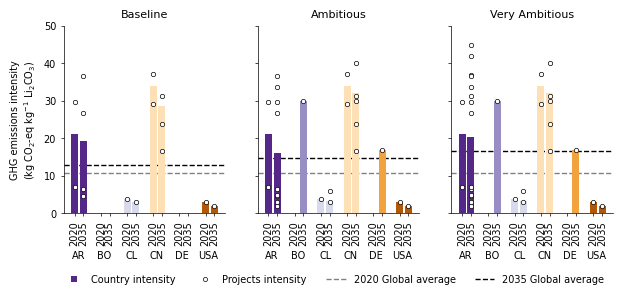

In [42]:
impact="Climate change"
ylabel='GHG emissions intensity\n(kg CO$_2$-eq kg$^{-1}$ Li$_2$CO$_3$)'
y_lim = (0, 50)
fig_name="fig4_climate_change_impacts_intensity.jpg"

fig_impacts_intensity(impact, ylabel, y_lim, fig_name)

### Figures S1: project-specific GHG emissions intensity

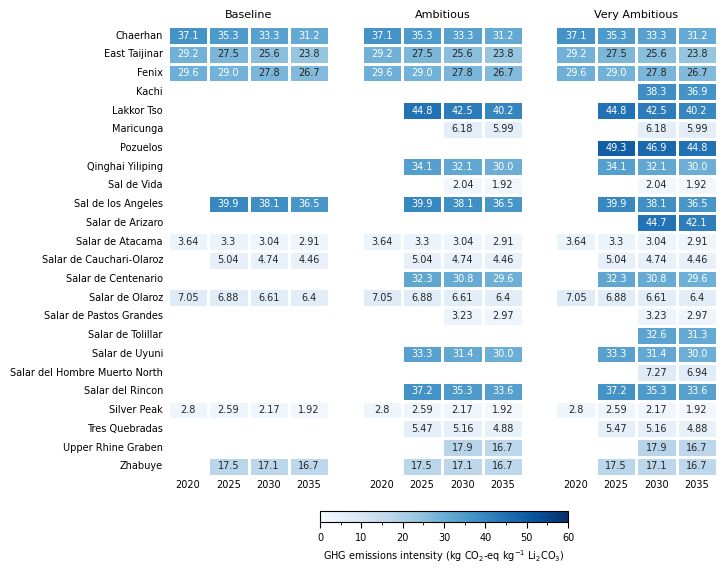

In [45]:
impact = "Climate change"
cmap = "Blues"
vmax= 60
cbar_label = "GHG emissions intensity (kg CO$_2$-eq kg$^{-1}$ Li$_2$CO$_3$)"
fig_name="SI_climate_change_impacts_intensity_projects.jpg"

fig_impacts_intensity_projects(impact, cmap, vmax, cbar_label, fig_name)

### Figures 6: contry-specific and global average water scarcity impacts intensity

In [46]:
print(impact_intensity_by_country("Water scarcity", "S&P-Baseline"))
print("-----------------------------------------------")
print(impact_intensity_by_country("Water scarcity", "S&P-Ambitious"))
print("-----------------------------------------------")
print(impact_intensity_by_country("Water scarcity", "S&P-Very Ambitious"))

Year            2020       2025       2030       2035
Country                                              
Argentina   7.556158   5.277312   6.397308   7.973778
Chile       6.059110   6.041992   6.025192   6.017844
China      11.393530  10.190629  10.157825  10.044932
USA         4.091448   4.068704   4.033213   4.005879
World       6.908680   6.469917   6.809804   7.328979
-----------------------------------------------
Year            2020       2025       2030       2035
Country                                              
Argentina   7.556158   6.641265   7.670672   8.440951
Bolivia          NaN  32.963041  32.037023  31.094005
Chile       6.059110   6.041992   6.322366   6.569043
China      11.393530  12.458796  11.716448  11.721054
Germany          NaN        NaN   4.706964   4.420103
USA         4.091448   4.068704   4.033213   4.005879
World       6.908680   7.804084   8.379307   9.254023
-----------------------------------------------
Year            2020       2025       20

In [47]:
print((impact_intensity_by_country("Water scarcity", "S&P-Baseline")[2035] - impact_intensity_by_country("Water scarcity", "S&P-Baseline")[2020]) / impact_intensity_by_country("Water scarcity", "S&P-Very Ambitious")[2020] * 100)
print((impact_intensity_by_country("Water scarcity", "S&P-Ambitious")[2035] - impact_intensity_by_country("Water scarcity", "S&P-Ambitious")[2020]) / impact_intensity_by_country("Water scarcity", "S&P-Very Ambitious")[2020] * 100)
print((impact_intensity_by_country("Water scarcity", "S&P-Very Ambitious")[2035] - impact_intensity_by_country("Water scarcity", "S&P-Very Ambitious")[2020]) / impact_intensity_by_country("Water scarcity", "S&P-Very Ambitious")[2020] * 100)

Country
Argentina     5.526894
Bolivia            NaN
Chile        -0.681058
China       -11.836529
Germany            NaN
USA          -2.091416
World         6.083637
dtype: float64
Country
Argentina    11.709565
Bolivia            NaN
Chile         8.415975
China         2.874645
Germany            NaN
USA          -2.091413
World        33.947767
dtype: float64
Country
Argentina    55.678944
Bolivia            NaN
Chile         8.415975
China         2.874645
Germany            NaN
USA          -2.091413
World        54.556295
dtype: float64


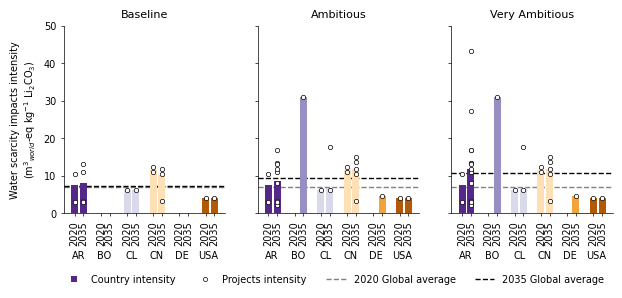

In [54]:
impact="Water scarcity"
ylabel="Water scarcity impacts intensity\n(m$^{3}$$_{world}$-eq kg$^{-1}$ Li$_2$CO$_3$)"
y_lim = (0,50)
fig_name="fig6_water_scarcity_impacts_intensity.jpg"

fig_impacts_intensity(impact, ylabel, y_lim, fig_name)

### Figures S1: project-specific GHG emissions intensity

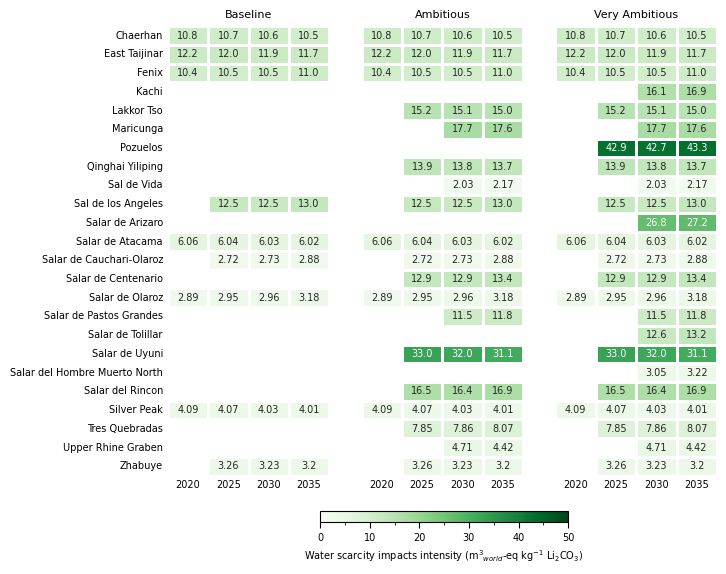

In [55]:
impact = "Water scarcity"
cmap = "Greens"
vmax= 50
cbar_label = "Water scarcity impacts intensity (m$^{3}$$_{world}$-eq kg$^{-1}$ Li$_2$CO$_3$)"
fig_name="SI_water_scarcity_impacts_intensity_projects.jpg"

fig_impacts_intensity_projects(impact, cmap, vmax, cbar_label, fig_name)

In [5]:
(6.02-6.06)/6.06*100


-0.6600660066006607

## 5. Global impacts

In [56]:
def impacts_by_country_df(impact, li_scenario, iam_scenario):
   df = impacts_by_country[(impacts_by_country["Impact"] == impact) & 
                            (impacts_by_country["Lithium scenario"] == li_scenario) &
                            (impacts_by_country["IAM scenario"] == iam_scenario)][["Country", "Year", "Total"]].pivot_table(
                            index='Country', columns='Year')["Total"].round(2).fillna(0)
   return df

def tech_contribution_df(impact, scenario):
    df = impacts_by_technology[(impacts_by_technology["Impact"] == impact) & 
                                (impacts_by_technology["Lithium scenario"] == scenario)][["Technology", "Year", "Total"]].pivot_table(
                                index='Technology', columns='Year')["Total"]
    df = df.div(df.sum()).multiply(100).round(2).fillna(0)
    return df

def impact_by_source_df(impact, scenario):
    df = impacts_by_source[(impacts_by_source["Lithium scenario"] == scenario) & 
                            (impacts_by_source["Impact"] == impact)][["Year", "Electricity", "Heat", "Reagents", "Direct emissions", "Other"]].pivot_table(
                            index='Year').T
    df = df.div(df.sum()).multiply(100).round(2)
    return df

In [57]:
def fig_global_impacts(
        impact, ylabel_global, axis_lims, fig_name
):
    fig, axs = plt.subplots(3, len(LI_SCENARIOS)+1, figsize=(fig_length[2], fig_height*0.65), sharey="row")

    axs[0,0].set_title("a", loc='left', x=-0.45, fontweight='bold', fontsize=10)
    axs[1,0].set_title("b", loc='left', x=-0.45, fontweight='bold', fontsize=10)
    axs[2,0].set_title("c", loc='left', x=-0.45, fontweight='bold', fontsize=10)

    for row in range(3):
        axs[row,0].set_ylabel(ylabel_global[row], fontsize=fontsize_label)
        axs[row,0].set_ylim(axis_lims)

        for col in range(len(LI_SCENARIOS)):
            scenario_name = list(LI_SCENARIOS.keys())[col]
            axs[0,col].set_title(scenario_name.replace("S&P-", "").strip("-"), loc='center', fontsize=fontsize_title)
            axis_standard_formating(axs[row,col])    
            axs[row,col].set_xticks([1,2,3,4])
            axs[row,col].set_xticklabels(['2020', "2025", '2030', "2035"], rotation=0, ha="center", fontsize=fontsize_axs)
        axs[row,3].axis('off')

    counter = 0
    years_positions = [1,2,3,4]
    for sc in LI_SCENARIOS:

        # Get total impacts by country and impact shares by technology and source in each scenario
        impact_country_sc = impacts_by_country[(impacts_by_country["Impact"] == impact) &
                                                (impacts_by_country["Lithium scenario"] == sc) & 
                                                (impacts_by_country["IAM scenario"] == "SSP2-NDC")][["Country", "Year", "Total"]].pivot_table(
                                                index='Country', columns='Year')["Total"].drop(index="World").fillna(0)
            
        impact_technology_sc = impacts_by_technology[(impacts_by_technology["Impact"] == impact) & 
                                                     (impacts_by_technology["Lithium scenario"] == sc)][["Technology", "Year", "Total"]].pivot_table(
                                                     index='Technology', columns='Year')["Total"].fillna(0)
        
        process_contribution_sc = impacts_by_source[(impacts_by_source["Lithium scenario"] == sc) & 
                                                    (impacts_by_source["Impact"] == impact)][["Year"] + list(PROCESS_CONTRIBUTIONS.keys())].set_index("Year").T.fillna(0)
        
        # Plot impacts
        dfs_for_plot = [impact_country_sc, impact_technology_sc, process_contribution_sc]
        labels_for_plot = [COUNTRIES, TECHNOLOGIES, PROCESS_CONTRIBUTIONS]

        for row in range(3):         
            bottom = [0,0,0,0]
            df_plot = dfs_for_plot[row]
            for c in labels_for_plot[row]:
                if c not in df_plot.index:
                    df_plot.loc[c] = 0
                
                impact_values = df_plot.loc[c].values.tolist()
                axs[row,counter].bar(years_positions, impact_values, bottom=bottom, color=labels_for_plot[row][c], 
                                     width=0.9, zorder=2)
                bottom = [bottom[i] + impact_values[i] for i in range(len(bottom))]

            # Donut charts
            relative_shares = df_plot[[2020, 2035]].div(df_plot[[2020, 2035]].sum(axis=0), axis=1) * 100
            colors_relatives = [labels_for_plot[row][cat] for cat in relative_shares.index]

            donut_size = 0.085
            donut_2020 = fig.add_axes([axs[row,counter].get_position().x0 - 0.006,
                                    axs[row,counter].get_position().y0 + (0.147 if row==0 else 0.136 if row==1 else 0.125), 
                                    donut_size, donut_size])
            donut_2035 = fig.add_axes([axs[row,counter].get_position().x0 + 0.058, 
                                    axs[row,counter].get_position().y0 + (0.147 if row==0 else 0.136 if row==1 else 0.125), 
                                    donut_size, donut_size])
            
            dn_data = [
                [donut_2020, relative_shares[2020].values, "2020"],
                [donut_2035, relative_shares[2035].values, "2035"]
            ]

            for dn in dn_data:
                wedges, texts = dn[0].pie(dn[1], colors=colors_relatives,
                                        wedgeprops={'edgecolor': 'black', 'linewidth': 0.25, "width": 0.5}, startangle=-40)
                bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
                kw = dict(arrowprops=dict(arrowstyle="-"),
                        bbox=bbox_props, zorder=0, va="center")

                for i, p in enumerate(wedges):
                    ang = (p.theta2 - p.theta1)/2. + p.theta1
                    y = np.sin(np.deg2rad(ang))
                    x = np.cos(np.deg2rad(ang))
                    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
                    connectionstyle = f"angle,angleA=0,angleB={ang}"
                    kw["arrowprops"].update({"connectionstyle": connectionstyle})
                    
                dn[0].text(0, 0, dn[2], color="black", ha='center', va='center', fontsize=6)

        counter += 1

    # LEGENDS
    handles = []
    for c in COUNTRIES:
        patch = Line2D([0], [0], color=COUNTRIES[c], label=c, ls='None', marker='o', mec="None", ms=6)
        handles.append(patch)
    leg_countries = axs[0,3].legend(handles=handles, loc="center left", ncol=1, frameon=False, edgecolor='black', 
                                    facecolor='White', fontsize=fontsize_legend, title='Countries:')

    handles = []
    for c in TECHNOLOGIES:
        patch = Line2D([0], [0], color=TECHNOLOGIES[c], label=c, ls='None', marker='o', mec="None", ms=6)
        handles.append(patch)
    leg_techs = axs[1,3].legend(handles=handles, loc="center left", ncol=1, frameon=False, edgecolor='black',
                                facecolor='White', fontsize=fontsize_legend, title='Technologies:')

    handles = []
    for pc in PROCESS_CONTRIBUTIONS:
        pc_label = pc

        if impact == "Climate change":
            if pc == "Direct emissions":
                pass
            else:
                patch = Line2D([0], [0], color=PROCESS_CONTRIBUTIONS[pc], label=pc_label, ls='None', marker='o', ms=6)
                handles.append(patch)

        if impact == "Water scarcity":
            if pc == "Direct emissions":
                pc_label = "Local water losses"
            patch = Line2D([0], [0], color=PROCESS_CONTRIBUTIONS[pc], label=pc_label, ls='None', marker='o', ms=6)
            handles.append(patch)

    leg_contrib = axs[2,3].legend(handles=handles, loc="center left", ncol=1, frameon=False, edgecolor='black', 
                                  facecolor='White', fontsize=fontsize_legend, title="Impact source:")

    for leg in [leg_countries, leg_techs, leg_contrib]:
      #  leg.get_frame().set_linewidth(0.5)
        leg.get_title().set_fontsize(fontsize_title-1)
        leg._legend_box.align = "left"

    fig.subplots_adjust(hspace=0.4, wspace=0.2)
    plt.savefig(FIG_EXPORT_DIR / fig_name, dpi=600, bbox_inches='tight')

### Figure 5: Global climate change impacts

In [58]:
print("**********************************")
print("Impacts under SSP2-NDC scenario")
print("**********************************")
print(impacts_by_country_df("Climate change", "S&P-Baseline", 'SSP2-NDC'))
print("-----------------------------------------------")
print(impacts_by_country_df("Climate change", "S&P-Ambitious", 'SSP2-NDC'))
print("-----------------------------------------------")
print(impacts_by_country_df("Climate change", "S&P-Very Ambitious", 'SSP2-NDC'))

**********************************
Impacts under SSP2-NDC scenario
**********************************
Year       2020  2025  2030  2035
Country                          
Argentina  0.67  1.50  2.97  4.65
Chile      0.41  0.90  0.97  0.90
China      0.78  2.21  3.10  2.91
USA        0.03  0.01  0.01  0.02
World      1.88  4.62  7.05  8.48
-----------------------------------------------
Year       2020  2025   2030   2035
Country                            
Argentina  0.67  2.30   5.15   6.88
Bolivia    0.00  0.15   0.74   1.48
Chile      0.41  0.90   1.02   0.99
China      0.78  4.89   5.13   5.05
Germany    0.00  0.00   0.32   0.37
USA        0.03  0.05   0.04   0.05
World      1.88  8.28  12.40  14.82
-----------------------------------------------
Year       2020  2025   2030   2035
Country                            
Argentina  0.67  2.68   9.30  12.68
Bolivia    0.00  0.15   0.74   1.48
Chile      0.41  0.90   1.16   1.14
China      0.78  4.89   5.13   5.05
Germany    0.00  0.00   

In [59]:
print("**********************************")
print("Impacts under SSP2-2°C scenario")
print("**********************************")
print(impacts_by_country_df("Climate change", "S&P-Baseline", 'SSP2-2°C'))
print("-----------------------------------------------")
print(impacts_by_country_df("Climate change", "S&P-Ambitious", 'SSP2-2°C'))
print("-----------------------------------------------")
print(impacts_by_country_df("Climate change", "S&P-Very Ambitious", 'SSP2-2°C'))

**********************************
Impacts under SSP2-2°C scenario
**********************************
Year       2020  2025  2030  2035
Country                          
Argentina  0.67  1.49  2.98  4.68
Chile      0.41  0.89  0.95  0.87
China      0.78  2.20  3.01  2.79
USA        0.03  0.01  0.01  0.02
World      1.88  4.59  6.95  8.36
-----------------------------------------------
Year       2020  2025   2030   2035
Country                            
Argentina  0.67  2.30   5.16   6.91
Bolivia    0.00  0.15   0.74   1.48
Chile      0.41  0.89   1.00   0.96
China      0.78  4.87   4.99   4.86
Germany    0.00  0.00   0.32   0.37
USA        0.03  0.05   0.04   0.05
World      1.88  8.25  12.26  14.65
-----------------------------------------------
Year       2020  2025   2030   2035
Country                            
Argentina  0.67  2.68   9.31  12.73
Bolivia    0.00  0.15   0.74   1.48
Chile      0.41  0.89   1.15   1.11
China      0.78  4.87   4.99   4.86
Germany    0.00  0.00   

In [60]:
# Climate change impacts times increase 2020-2035:
print(round(impacts_by_country_df("Climate change", "S&P-Baseline", 'SSP2-NDC').loc["World"][2035] / impacts_by_country_df("Climate change", "S&P-Baseline", 'SSP2-NDC').loc["World"][2020], 1))
print(round(impacts_by_country_df("Climate change", "S&P-Ambitious", 'SSP2-NDC').loc["World"][2035] / impacts_by_country_df("Climate change", "S&P-Ambitious", 'SSP2-NDC').loc["World"][2020], 1))
print(round(impacts_by_country_df("Climate change", "S&P-Very Ambitious", 'SSP2-NDC').loc["World"][2035] / impacts_by_country_df("Climate change", "S&P-Very Ambitious", 'SSP2-NDC').loc["World"][2020], 1))

4.5
7.9
11.1


In [61]:
emissions_increase = (impacts_by_country_df("Climate change", "S&P-Very Ambitious", 'SSP2-NDC').loc["World"][2035] - impacts_by_country_df("Climate change", "S&P-Very Ambitious", 'SSP2-NDC').loc["World"][2020])
increase_expand_prod = (impacts_by_country_df("Climate change", "S&P-Baseline", 'SSP2-NDC').loc["World"][2035] - impacts_by_country_df("Climate change", "S&P-Baseline", 'SSP2-NDC').loc["World"][2020]) / emissions_increase * 100
increase_develop_proj = (impacts_by_country_df("Climate change", "S&P-Ambitious", 'SSP2-NDC').loc["World"][2035] - impacts_by_country_df("Climate change", "S&P-Baseline", 'SSP2-NDC').loc["World"][2035]) / emissions_increase * 100
increase_early_stage = (impacts_by_country_df("Climate change", "S&P-Very Ambitious", 'SSP2-NDC').loc["World"][2035] - impacts_by_country_df("Climate change", "S&P-Ambitious", 'SSP2-NDC').loc["World"][2035]) / emissions_increase * 100

print("Emissions increase:", emissions_increase)
print("Emissions increase prod expansion existing:", increase_expand_prod)
print("Emissions increase developed projects:", increase_develop_proj)
print("Emissions increase early stage:", increase_early_stage)
print("Emissions develppment:", increase_develop_proj + increase_early_stage)

Emissions increase: 18.900000000000002
Emissions increase prod expansion existing: 34.92063492063492
Emissions increase developed projects: 33.54497354497354
Emissions increase early stage: 31.53439153439154
Emissions develppment: 65.07936507936508


In [62]:
impacts_by_country_df("Climate change", "S&P-Baseline", 'SSP2-NDC').divide(impacts_by_country_df("Climate change", "S&P-Baseline", 'SSP2-NDC').loc["World"]).multiply(100)

Year,2020,2025,2030,2035
Country,,,,
Argentina,35.638298,32.467532,42.127660,54.834906
Chile,21.808511,19.480519,13.758865,10.613208
China,41.489362,47.835498,43.971631,34.316038
USA,1.595745,0.216450,0.141844,0.235849
World,100.000000,100.000000,100.000000,100.000000


In [63]:
impacts_by_country_df("Climate change", "S&P-Very Ambitious", 'SSP2-NDC').divide(impacts_by_country_df("Climate change", "S&P-Very Ambitious", 'SSP2-NDC').loc["World"]).multiply(100)

Year,2020,2025,2030,2035
Country,,,,
Argentina,35.638298,30.911188,55.721989,61.020212
Bolivia,0.000000,1.730104,4.433793,7.122233
Chile,21.808511,10.380623,6.950270,5.486044
China,41.489362,56.401384,30.736968,24.302214
Germany,0.000000,0.000000,1.917316,1.780558
USA,1.595745,0.576701,0.239664,0.240616
World,100.000000,100.000000,100.000000,100.000000


**Climate change impacts by technology (only SSP2-NDC scenario)**

In [64]:
print(tech_contribution_df("Climate change", "S&P-Baseline"))
print("-----------------------------------------------")
print(tech_contribution_df("Climate change", "S&P-Ambitious"))
print("-----------------------------------------------")
print(tech_contribution_df("Climate change", "S&P-Very Ambitious"))

Year                2020   2025   2030   2035
Technology                                   
DLE                72.38  67.42  75.99  81.21
Evaporative ponds  21.67  23.82  17.63  13.80
Ion exchangers      5.95   8.75   6.38   5.00
-----------------------------------------------
Year                  2020   2025   2030   2035
Technology                                     
DLE                  72.38  79.14  78.53  81.29
Evaporative ponds    21.67  14.63  12.90  11.21
Geothermal            0.00   0.00   2.55   2.50
Ion exchangers        5.95   4.88   3.63   2.86
Modelled as average   0.00   1.34   2.38   2.14
-----------------------------------------------
Year                  2020   2025   2030   2035
Technology                                     
DLE                  72.38  75.80  73.64  77.73
Evaporative ponds    21.67  13.99  10.26   8.52
Geothermal            0.00   0.00   1.90   1.79
Ion exchangers        5.95   4.67   2.69   2.04
Modelled as average   0.00   5.54  11.50   9.93


**Climate change impacts by source**

In [65]:
print(impact_by_source_df("Climate change", "S&P-Baseline"))
print("-----------------------------------------------")
print(impact_by_source_df("Climate change", "S&P-Ambitious"))
print("-----------------------------------------------")
print(impact_by_source_df("Climate change", "S&P-Very Ambitious"))

Year               2020   2025   2030   2035
Direct emissions   0.00   0.00   0.00   0.00
Electricity       13.46  11.34   8.49   5.74
Heat              56.34  57.73  64.52  68.55
Other             10.08  10.21   9.13   8.65
Reagents          20.12  20.73  17.86  17.06
-----------------------------------------------
Year               2020   2025   2030   2035
Direct emissions   0.00   0.00   0.00   0.00
Electricity       13.46  12.00   8.04   5.38
Heat              56.34  65.27  66.66  68.93
Other             10.08   7.37   7.77   7.69
Reagents          20.12  15.36  17.53  18.00
-----------------------------------------------
Year               2020   2025   2030   2035
Direct emissions   0.00   0.00   0.00   0.00
Electricity       13.46  11.75   7.03   4.75
Heat              56.34  64.97  66.43  68.37
Other             10.08   7.48   7.71   7.46
Reagents          20.12  15.80  18.83  19.42


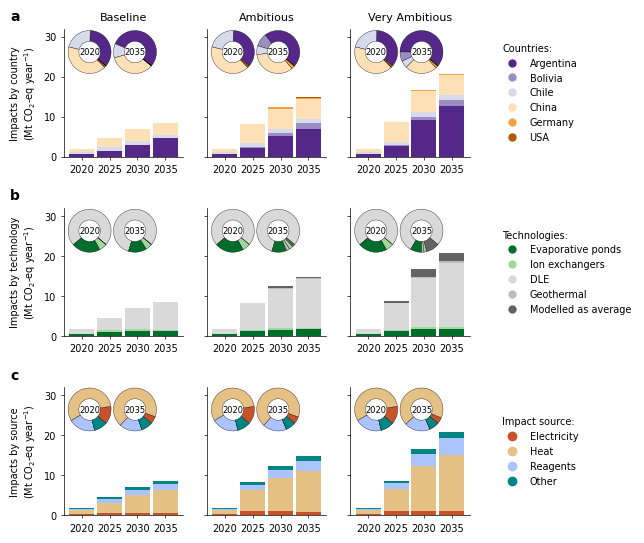

In [67]:
impact="Climate change"
ylabel_global=["Impacts by country\n(Mt CO$_2$-eq year$^{-1}$)",
               "Impacts by technology\n(Mt CO$_2$-eq year$^{-1}$)",
               "Impacts by source\n(Mt CO$_2$-eq year$^{-1}$)",]
axis_lims = (0,32)
fig_name="fig5_global_climate_change_impacts.jpg"

fig_global_impacts(impact, ylabel_global, axis_lims, fig_name)

### Figure 7: Global water scarcity impacts

In [68]:
print("**********************************")
print("Impacts under SSP2-NDC scenario")
print("**********************************")
print(impacts_by_country_df("Water scarcity", "S&P-Baseline", 'SSP2-NDC'))
print("-----------------------------------------------")
print(impacts_by_country_df("Water scarcity", "S&P-Ambitious", 'SSP2-NDC'))
print("-----------------------------------------------")
print(impacts_by_country_df("Water scarcity", "S&P-Very Ambitious", 'SSP2-NDC'))

**********************************
Impacts under SSP2-NDC scenario
**********************************
Year       2020  2025  2030  2035
Country                          
Argentina  0.24  0.59  1.18  1.94
Chile      0.68  1.65  1.92  1.86
China      0.26  0.71  1.03  1.02
USA        0.04  0.02  0.02  0.03
World      1.22  2.97  4.15  4.85
-----------------------------------------------
Year       2020  2025  2030  2035
Country                          
Argentina  0.24  1.04  2.60  3.61
Bolivia    0.00  0.15  0.75  1.54
Chile      0.68  1.65  2.07  2.14
China      0.26  1.65  1.77  1.84
Germany    0.00  0.00  0.08  0.10
USA        0.04  0.07  0.08  0.11
World      1.22  4.55  7.35  9.33
-----------------------------------------------
Year       2020  2025   2030   2035
Country                            
Argentina  0.24  1.21   5.05   7.33
Bolivia    0.00  0.15   0.75   1.54
Chile      0.68  1.65   2.36   2.45
China      0.26  1.65   1.77   1.84
Germany    0.00  0.00   0.08   0.10
USA   

In [69]:
# Water use impacts times increase 2020-2035:
print(round(impacts_by_country_df("Water scarcity", "S&P-Baseline", 'SSP2-NDC').loc["World"][2035] / impacts_by_country_df("Water scarcity", "S&P-Baseline", 'SSP2-NDC').loc["World"][2020], 1))
print(round(impacts_by_country_df("Water scarcity", "S&P-Ambitious", 'SSP2-NDC').loc["World"][2035] / impacts_by_country_df("Water scarcity", "S&P-Ambitious", 'SSP2-NDC').loc["World"][2020], 1))
print(round(impacts_by_country_df("Water scarcity", "S&P-Very Ambitious", 'SSP2-NDC').loc["World"][2035] / impacts_by_country_df("Water scarcity", "S&P-Very Ambitious", 'SSP2-NDC').loc["World"][2020], 1))

4.0
7.6
11.0


In [70]:
water_increase = (impacts_by_country_df("Water scarcity", "S&P-Very Ambitious", 'SSP2-NDC').loc["World"][2035] - impacts_by_country_df("Water scarcity", "S&P-Very Ambitious", 'SSP2-NDC').loc["World"][2020])
increase_expand_prod = (impacts_by_country_df("Water scarcity", "S&P-Baseline", 'SSP2-NDC').loc["World"][2035] - impacts_by_country_df("Water scarcity", "S&P-Baseline", 'SSP2-NDC').loc["World"][2020]) / water_increase * 100
increase_develop_proj = (impacts_by_country_df("Water scarcity", "S&P-Ambitious", 'SSP2-NDC').loc["World"][2035] - impacts_by_country_df("Water scarcity", "S&P-Baseline", 'SSP2-NDC').loc["World"][2035]) / water_increase * 100
increase_early_stage = (impacts_by_country_df("Water scarcity", "S&P-Very Ambitious", 'SSP2-NDC').loc["World"][2035] - impacts_by_country_df("Water scarcity", "S&P-Ambitious", 'SSP2-NDC').loc["World"][2035]) / water_increase * 100

print("Water scarcity increase:", water_increase)
print("Water scarcity  increase prod expansion existing:", increase_expand_prod)
print("Water scarcity  increase developed projects:", increase_develop_proj)
print("Water scarcity  increase early stage:", increase_early_stage)
print("Water scarcity  develppment:", increase_develop_proj + increase_early_stage)

Water scarcity increase: 12.139999999999999
Water scarcity  increase prod expansion existing: 29.901153212520594
Water scarcity  increase developed projects: 36.90280065897859
Water scarcity  increase early stage: 33.196046128500825
Water scarcity  develppment: 70.09884678747942


In [71]:
impacts_by_country_df("Water scarcity", "S&P-Baseline", 'SSP2-NDC').divide(impacts_by_country_df("Water scarcity", "S&P-Baseline", 'SSP2-NDC').loc["World"]).multiply(100)

Year,2020,2025,2030,2035
Country,,,,
Argentina,19.672131,19.865320,28.433735,40.000000
Chile,55.737705,55.555556,46.265060,38.350515
China,21.311475,23.905724,24.819277,21.030928
USA,3.278689,0.673401,0.481928,0.618557
World,100.000000,100.000000,100.000000,100.000000


In [72]:
impacts_by_country_df("Water scarcity", "S&P-Ambitious", 'SSP2-NDC').divide(impacts_by_country_df("Water scarcity", "S&P-Ambitious", 'SSP2-NDC').loc["World"]).multiply(100)

Year,2020,2025,2030,2035
Country,,,,
Argentina,19.672131,22.857143,35.374150,38.692390
Bolivia,0.000000,3.296703,10.204082,16.505895
Chile,55.737705,36.263736,28.163265,22.936763
China,21.311475,36.263736,24.081633,19.721329
Germany,0.000000,0.000000,1.088435,1.071811
USA,3.278689,1.538462,1.088435,1.178992
World,100.000000,100.000000,100.000000,100.000000


In [73]:
impacts_by_country_df("Water scarcity", "S&P-Very Ambitious", 'SSP2-NDC').divide(impacts_by_country_df("Water scarcity", "S&P-Very Ambitious", 'SSP2-NDC').loc["World"]).multiply(100)

Year,2020,2025,2030,2035
Country,,,,
Argentina,19.672131,25.581395,50.049554,54.865269
Bolivia,0.000000,3.171247,7.433102,11.526946
Chile,55.737705,34.883721,23.389495,18.338323
China,21.311475,34.883721,17.542121,13.772455
Germany,0.000000,0.000000,0.792864,0.748503
USA,3.278689,1.479915,0.792864,0.823353
World,100.000000,100.000000,100.000000,100.000000


In [74]:
print(tech_contribution_df("Water scarcity", "S&P-Baseline"))
print("-----------------------------------------------")
print(tech_contribution_df("Water scarcity", "S&P-Ambitious"))
print("-----------------------------------------------")
print(tech_contribution_df("Water scarcity", "S&P-Very Ambitious"))

Year                2020   2025   2030   2035
Technology                                   
DLE                38.20  35.72  45.76  54.17
Evaporative ponds  55.63  59.12  50.03  41.97
Ion exchangers      6.17   5.16   4.22   3.86
-----------------------------------------------
Year                  2020   2025   2030   2035
Technology                                     
DLE                  38.20  52.58  55.94  61.42
Evaporative ponds    55.63  42.12  37.96  33.13
Geothermal            0.00   0.00   1.14   1.05
Ion exchangers        6.17   3.37   2.38   2.01
Modelled as average   0.00   1.94   2.58   2.39
-----------------------------------------------
Year                  2020   2025   2030   2035
Technology                                     
DLE                  38.20  50.83  56.47  63.31
Evaporative ponds    55.63  40.53  28.13  23.50
Geothermal            0.00   0.00   0.83   0.73
Ion exchangers        6.17   3.24   1.74   1.40
Modelled as average   0.00   5.40  12.83  11.06


In [75]:
print(impact_by_source_df("Water scarcity", "S&P-Baseline"))
print("-----------------------------------------------")
print(impact_by_source_df("Water scarcity", "S&P-Ambitious"))
print("-----------------------------------------------")
print(impact_by_source_df("Water scarcity", "S&P-Very Ambitious"))

Year               2020   2025   2030   2035
Direct emissions  51.77  54.41  50.10  42.90
Electricity        6.22   6.58   8.56  12.48
Heat               1.40   1.40   1.68   1.82
Other              7.57   6.41   5.74   5.51
Reagents          33.04  31.21  33.91  37.29
-----------------------------------------------
Year               2020   2025   2030   2035
Direct emissions  51.77  55.57  46.12  40.99
Electricity        6.22   7.29   9.96  12.09
Heat               1.40   1.86   1.73   1.66
Other              7.57   5.24   4.57   4.20
Reagents          33.04  30.05  37.62  41.06
-----------------------------------------------
Year               2020   2025   2030   2035
Direct emissions  51.77  54.21  43.11  38.17
Electricity        6.22   7.78  10.74  12.94
Heat               1.40   1.86   1.69   1.61
Other              7.57   5.21   4.06   3.66
Reagents          33.04  30.95  40.41  43.62


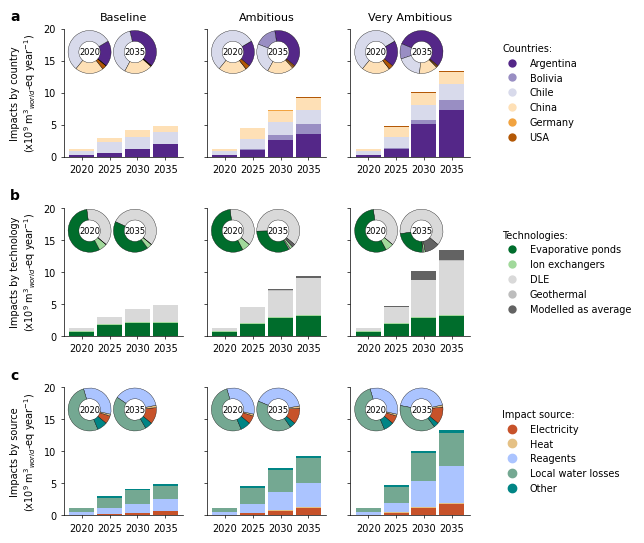

In [76]:
impact="Water scarcity"
ylabel_global=["Impacts by country\n(x10$^{9}$ m$^{3}$$_{world}$-eq year$^{-1}$)",
               "Impacts by technology\n(x10$^{9}$ m$^{3}$$_{world}$-eq year$^{-1}$)",
               "Impacts by source\n(x10$^{9}$ m$^{3}$$_{world}$-eq year$^{-1}$)",]
axis_lims = (0,20)
fig_name="fig7_global_water_impacts.jpg"

fig_global_impacts(impact, ylabel_global, axis_lims, fig_name)

## 6. Sensitivity analysis

**Sensitivity to impacts by source**

In [77]:
SA_impacts_sources_df

,Impact,Lithium scenario,Source,Variation,2035 intensity var
0,Climate change,S&P-Baseline,Electricity,-100.0,12.073737
1,Climate change,S&P-Baseline,Electricity,-90.0,12.147292
2,Climate change,S&P-Baseline,Electricity,-80.0,12.220847
3,Climate change,S&P-Baseline,Electricity,-70.0,12.294401
4,Climate change,S&P-Baseline,Electricity,-60.0,12.367956
...,...,...,...,...,...
499,Water scarcity,S&P-Very Ambitious,Direct emissions,60.0,13.123196
500,Water scarcity,S&P-Very Ambitious,Direct emissions,70.0,13.530762
501,Water scarcity,S&P-Very Ambitious,Direct emissions,80.0,13.938328
502,Water scarcity,S&P-Very Ambitious,Direct emissions,90.0,14.345894


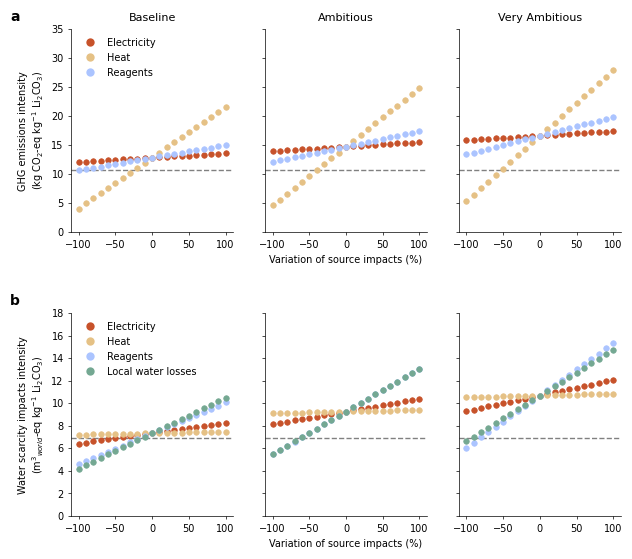

In [78]:
fig, axs = plt.subplots(2, len(LI_SCENARIOS), figsize=(fig_length[2], fig_height*0.65), sharey="row")

axs[0,0].set_title("a", loc='left', x=-0.38, fontweight='bold', fontsize=10)
axs[1,0].set_title("b", loc='left', x=-0.38, fontweight='bold', fontsize=10)

axs[0,0].set_ylabel('GHG emissions intensity\n(kg CO$_2$-eq kg$^{-1}$ Li$_2$CO$_3$)', fontsize=fontsize_label)
axs[1,0].set_ylabel("Water scarcity impacts intensity\n(m$^{3}$$_{world}$-eq kg$^{-1}$ Li$_2$CO$_3$)", fontsize=fontsize_label)
axs[0,0].set_ylim(0,35)
axs[1,0].set_ylim(0,18)

count_row = 0
for impact in ["Climate change", "Water scarcity"]:
    for col in range(len(LI_SCENARIOS)):
        scenario_name = list(LI_SCENARIOS.keys())[col]
        axs[0,col].set_title(scenario_name.replace("S&P-", "").strip("-"), loc='center', fontsize=fontsize_title)

        SA_intensity_sc = SA_impacts_sources_df[(SA_impacts_sources_df["Impact"] == impact) &
                                        (SA_impacts_sources_df["Lithium scenario"] == scenario_name)][["Source", "Variation", "2035 intensity var"]]
        
        # Plot impact in 2020
        impact_intensity_sc_2020 = impact_intensity_by_country(impact, scenario_name)[2020]["World"]
        axs[count_row,col].axhline(impact_intensity_sc_2020, color="grey", ls="--", lw=1, zorder=0)

        for source in ["Electricity", "Heat", "Reagents", "Direct emissions"]:
            if impact == "Climate change" and source=="Direct emissions":
                pass
            else:
                intensity_to_plot = SA_intensity_sc[SA_intensity_sc["Source"] == source][["Variation", "2035 intensity var"]].set_index("Variation")
                intensity_to_plot.plot(ax=axs[count_row,col], ls="None", lw=0.5, mew=0.5, marker="o", ms=4, zorder=2, color=PROCESS_CONTRIBUTIONS[source], legend=False)
    count_row += 1

for row in range(2):
    for col in range(len(LI_SCENARIOS)):
        
        axis_standard_formating(axs[row,col])
        axs[row,col].set_xlabel("", fontsize=fontsize_label)
    axs[row,1].set_xlabel("Variation of source impacts (%)", fontsize=fontsize_label)

# LEGENDS
for row in range(2):
    handles = []
    for source in ["Electricity", "Heat", "Reagents", "Direct emissions"]:
        source_label = source
        if row==0 and source=="Direct emissions":
            pass
        else:
            if row == 1 and source == "Direct emissions":
                source_label = "Local water losses"
            patch = Line2D([0], [0], color=PROCESS_CONTRIBUTIONS[source], label=source_label, ls='None', marker='o', mec="None", ms=6)
            handles.append(patch)
    leg_source = axs[row,0].legend(handles=handles, loc="upper left", ncol=1, frameon=False, edgecolor='black', 
                                    facecolor='White', fontsize=fontsize_legend)
    leg_source.get_title().set_fontsize(fontsize_title-1)
    leg_source._legend_box.align = "left"

fig.subplots_adjust(hspace=0.4, wspace=0.2)
plt.savefig(FIG_EXPORT_DIR / "SI_SA_impacts_sources.jpg", dpi=600, bbox_inches='tight')

**Sensitivity to the impacts intensity by country**

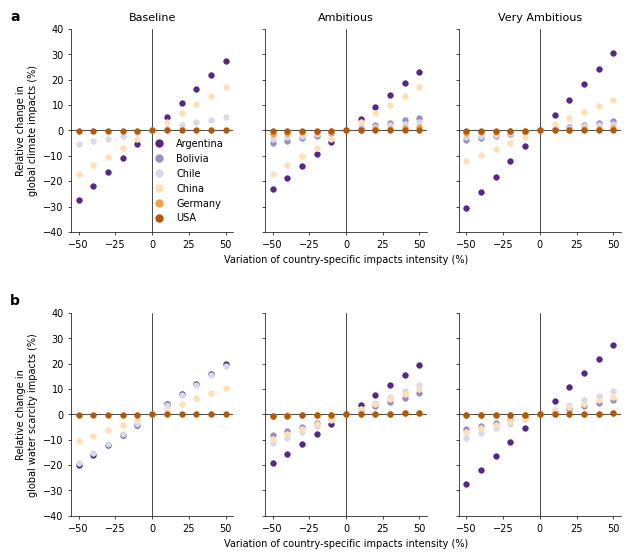

In [79]:
fig, axs = plt.subplots(2, len(LI_SCENARIOS), figsize=(fig_length[2], fig_height*0.65), sharey="row")

axs[0,0].set_title("a", loc='left', x=-0.38, fontweight='bold', fontsize=10)
axs[1,0].set_title("b", loc='left', x=-0.38, fontweight='bold', fontsize=10)

axs[0,0].set_ylabel("Relative change in\nglobal climate impacts (%)", fontsize=fontsize_label)
axs[1,0].set_ylabel("Relative change in\nglobal water scarcity impacts (%)", fontsize=fontsize_label)

count_row = 0
for impact in ["Climate change", "Water scarcity"]:
    for col in range(len(LI_SCENARIOS)):
        scenario_name = list(LI_SCENARIOS.keys())[col]
        axs[0,col].set_title(scenario_name.replace("S&P-", "").strip("-"), loc='center', fontsize=fontsize_title)

        SA_intensity_sc = SA_country_impacts_intensity_df[(SA_country_impacts_intensity_df["Impact"] == impact) &
                                        (SA_country_impacts_intensity_df["Lithium scenario"] == scenario_name) & 
                                        (SA_country_impacts_intensity_df["Year"] == 2035)][["Country", "Variation", "Intensity var"]]
        
        for c in COUNTRY_LABEL:
            intensity_to_plot = SA_intensity_sc[SA_intensity_sc["Country"] == c][["Variation", "Intensity var"]].set_index("Variation")
            intensity_to_plot.plot(ax=axs[count_row,col], ls="None", lw=0.5, mew=0.5, marker="o", ms=4, zorder=2, color=COUNTRIES[COUNTRY_LABEL[c]], legend=False)
    count_row += 1

for row in range(2):
    axs[row,0].set_ylim(-40,40)
    for col in range(len(LI_SCENARIOS)):
        axis_standard_formating(axs[row,col])
        axs[row,col].axvline(x=0, ls="-", lw=spineline_width, color="black", zorder=0)
        axs[row,col].axhline(y=0, ls="-", lw=spineline_width, color="black", zorder=0)
        axs[row,col].set_xlabel("", fontsize=fontsize_label)
    axs[row,1].set_xlabel("Variation of country-specific impacts intensity (%)", fontsize=fontsize_label)

# LEGENDS
handles = []
for c in COUNTRIES:
    patch = Line2D([0], [0], color=COUNTRIES[c], label=c, ls='None', marker='o', mec="None", ms=6)
    handles.append(patch)
leg_countries = axs[0,0].legend(handles=handles, loc="lower right", ncol=1, frameon=False, edgecolor='black', 
                                facecolor='White', fontsize=fontsize_legend)
leg_countries.get_title().set_fontsize(fontsize_title-1)
leg_countries._legend_box.align = "left"

fig.subplots_adjust(hspace=0.4, wspace=0.2)
plt.savefig(FIG_EXPORT_DIR / "SI_SA_country_impacts_intensity.jpg", dpi=600, bbox_inches='tight')

In [81]:
SA_country_impacts_intensity_df[(SA_country_impacts_intensity_df["Impact"] == "Climate change") &
                                        (SA_country_impacts_intensity_df["Lithium scenario"] == "S&P-Very Ambitious") &
                                         (SA_country_impacts_intensity_df["Country"] == "AR") &
                                        (SA_country_impacts_intensity_df["Year"] == 2035)][["Variation", "Intensity var"]]

,Variation,Intensity var
572,-50.0,-30.520325
573,-40.0,-24.416260
574,-30.0,-18.312195
575,-20.0,-12.208129
576,-10.0,-6.104064
577,0.0,0.000001
578,10.0,6.104067
579,20.0,12.208132
580,30.0,18.312197
581,40.0,24.416263


In [80]:
SA_country_impacts_intensity_df[(SA_country_impacts_intensity_df["Impact"] == "Climate change") &
                                        (SA_country_impacts_intensity_df["Lithium scenario"] == "S&P-Very Ambitious") &
                                         (SA_country_impacts_intensity_df["Country"] == "CN") &
                                        (SA_country_impacts_intensity_df["Year"] == 2035)][["Variation", "Intensity var"]]

,Variation,Intensity var
605,-50.0,-12.144305
606,-40.0,-9.715443
607,-30.0,-7.286582
608,-20.0,-4.857721
609,-10.0,-2.428860
610,0.0,0.000001
611,10.0,2.428862
612,20.0,4.857724
613,30.0,7.286585
614,40.0,9.715446
